In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

# Add my own files
sys.path.append('./')
import organize_data
import utils
import preprocessing

# Preprocessing of data

## EEG

In [2]:
# Settings pane
experiments = utils.get_list_of_experiments()

frequency = 250

dt = 1/frequency

print(f"Here is a list of all the available experiments:")
for i in range(len(experiments)):
    print(f"{i}: {experiments[i]}")

Here is a list of all the available experiments:
0: Experiment_03_11_21
1: Experiment_04_11_21
2: Experiment_05_11_21


### Get data

In [3]:
# choose an experiment from the list
chosen_experiment = 0

# get EEG and Empatica data:
# time_intervals = get_time_intervals(experiments[chosen_experiment])

eeg_data = organize_data.get_eeg_data_object(experiments[chosen_experiment])

### Display raw_data

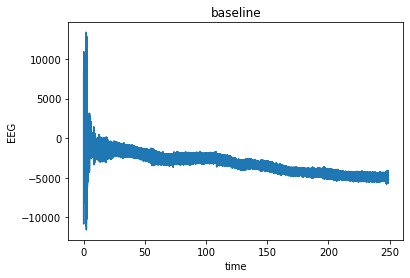

In [14]:
electrode = 2
signal = eeg_data["baseline"][:,electrode]
time = np.arange(len(signal))*dt

plt.figure()
plt.title("baseline")
plt.ylabel("EEG")
plt.xlabel("time")
plt.plot(time,signal)

### Trim signal

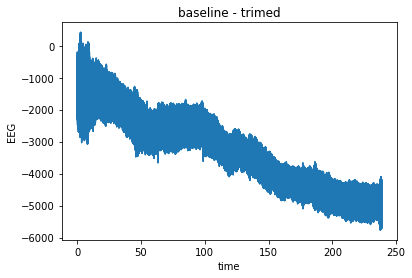

In [15]:
# Trim signal
signal = preprocessing.trim_signal(signal,dt,10,time[-1])
time = np.arange(len(signal))*dt

plt.figure()
plt.title("baseline - trimed")
plt.ylabel("EEG")
plt.xlabel("time")
plt.plot(time,signal)

### Basic preprocessing

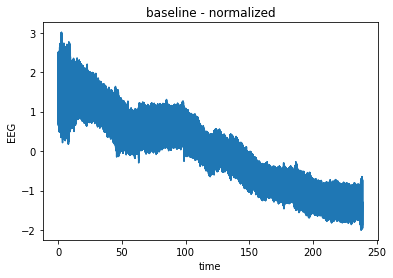

In [16]:
# Normalize:

signal = preprocessing.normalize(signal)

plt.figure()
plt.title("baseline - normalized")
plt.ylabel("EEG")
plt.xlabel("time")
plt.plot(time,signal)

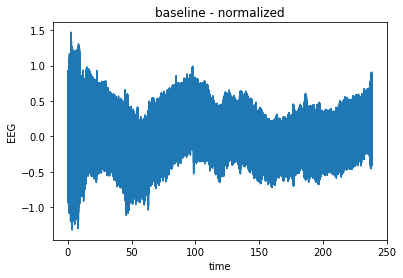

In [17]:
# remove trend

signal = preprocessing.remove_trend(time, signal, 2)

plt.figure()
plt.title("baseline - normalized")
plt.ylabel("EEG")
plt.xlabel("time")
plt.plot(time,signal)

C:\Users\petteska\Anaconda3\envs\Data_analysis\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


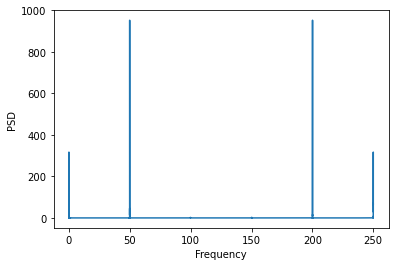

C:\Users\petteska\Anaconda3\envs\Data_analysis\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-0.003818   -0.00232798  0.00040577 ...  0.00081664 -0.00228376
 -0.00383815]


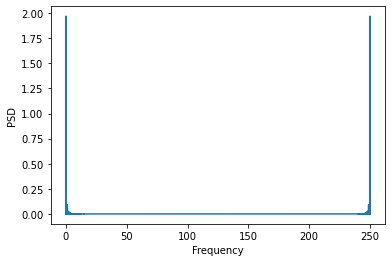

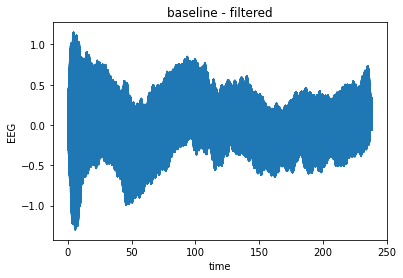

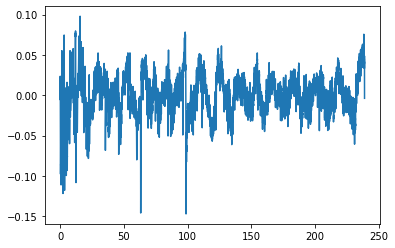

In [18]:
# Filter:
preprocessing.display_psd_fourier(signal, frequency)

signal_filtered = preprocessing.reduce_signal_fft(signal, 2)

# signal_lowpass = preprocessing.lowpass_fft(signal, frequency, 40)

# signal_lowpass = preprocessing.highpass_fft(signal_lowpass, frequency, 220)

# signal_lowpass = preprocessing.bandstopp_fft(signal, frequency, 40,220)

signal_lowpass = preprocessing.bandpass_fft(signal, frequency,0.05,15)

# signal_lowpass = preprocessing.reduce_signal_fft(signal_lowpass, 0.2)

print(signal_lowpass)


preprocessing.display_psd_fourier(signal_lowpass, frequency)


plt.figure()
plt.title("baseline - filtered")
plt.ylabel("EEG")
plt.xlabel("time")
plt.plot(time,signal_filtered)

plt.figure()
plt.plot(time,signal_lowpass)

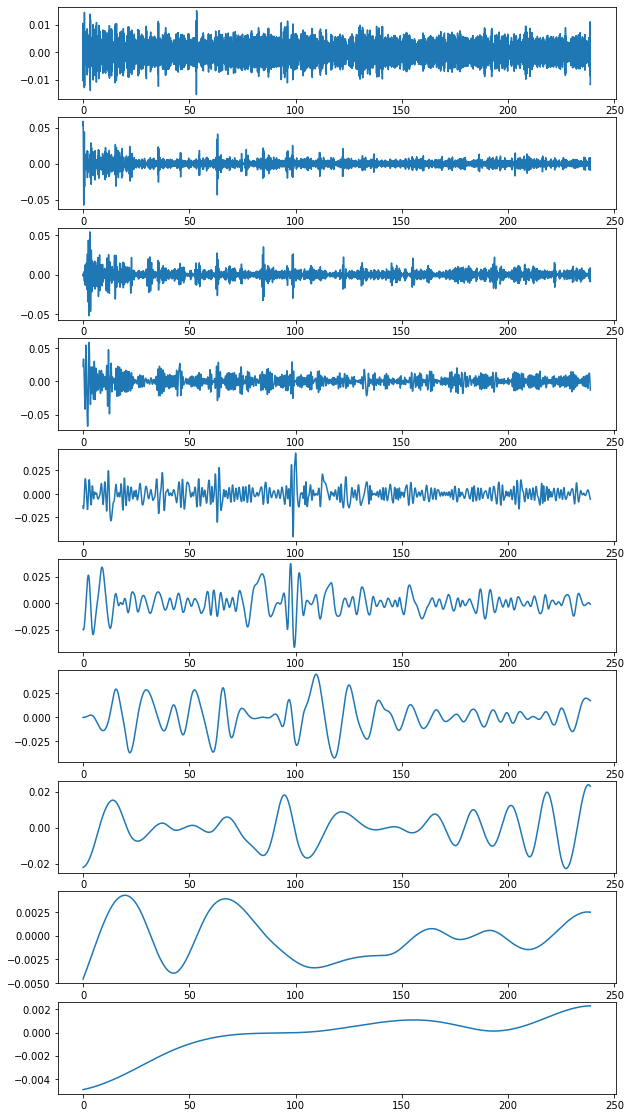

In [19]:
preprocessing.plot_emd_imfs(signal_lowpass, time)

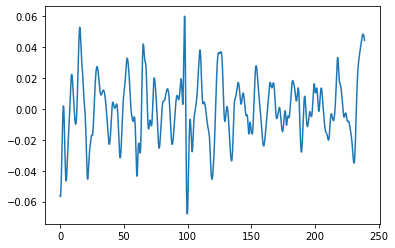

In [21]:
final_signal = preprocessing.remove_emd_imfs(signal_lowpass,[0,1,2,3,4])

plt.figure()
plt.plot(time,final_signal)